###### Add comments to your answers to get  full credit

# CS 240 EXPLORATORY DATA ANALYSIS
# Assignment 4
## Due to: Sunday, May 12th, 23:59

**Assignment Submission:** Turn in your assignment by the due date through LMS. 
For your submissions, you should use the Assignment .ipynb file and save the file as  your-first-name_your-last-name.ipynb. Run all the cells and upload the file on LMS.<b>

All work in the questions must be your own; you must neither copy from nor provide assistance to anybody else. If you need guidance for any question, talk to the instructor or teaching assistants.<b>

**Late Assignment Policy:** You have a total of 5 days of late assignment turn-in allowance throughout this semester. For a single assignment, you can use a maximum of 2 late-days. You decide which assignments you are going to use your late-days. After assignment due date/time, each 24-hours period is counted as one late date (i.e., if you submit late 1 hour or 23 hours, you use 1 late-date).  It is your responsibility to keep track of your late days. If you are late more than 2 days for any assignment or you exhausted your late days, you get 0 from the late assignment (No exceptions)

In [46]:
# Run this cell to set up the notebook, but please don't change it.
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Prediction: Linear Regression

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

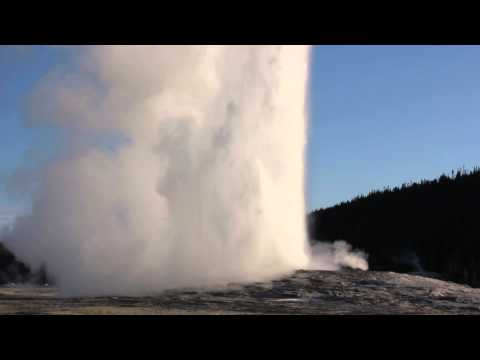

In [47]:

# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg

from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  We will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes
- **wait**: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [48]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

#### Question 1
Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis.

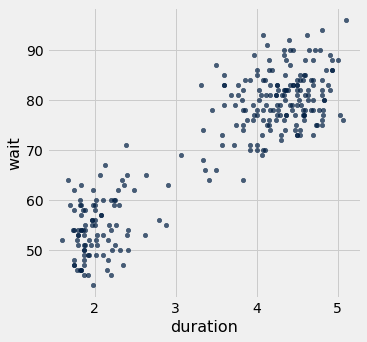

In [49]:
faithful.scatter('duration')

Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?

The relationship is positive as we said before and linear related. Because we look on scatter plot, every long eruption duration there is long waiting time. 

We're going to continue with the assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

#### Question 2
Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named `"duration (standard units)"` and `"wait (standard units)"`.

In [50]:
duration_mean = np.mean(faithful.column("duration"))
duration_std = np.std(faithful.column("duration"))
wait_mean = np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))
#print(duration_mean)
#print(duration_std)
#print(wait_mean)
#print(wait_std)
#This function is aboutto find standard units. 
def standard_units(x):
    return (x - np.mean(x))/np.std(x)
faithful_standard = Table().with_columns(
    "duration (standard units)", standard_units(faithful.column("duration")),
    "wait (standard units)", standard_units(faithful.column("wait")))
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


#### Question 3
Plot scatter plat again, but this time in standard units.

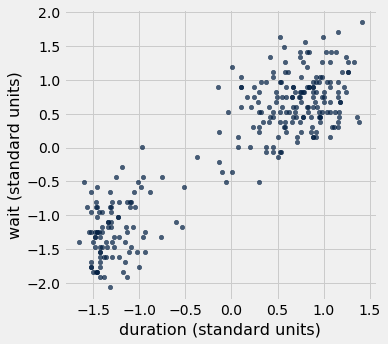

In [51]:
faithful_standard.scatter('duration (standard units)')

You'll notice that this plot looks  the same as the last one! 

Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

If we focus on plot, I think 0 is closest to correlation because there are two sides for waiting and eruption times. Actually it is in center.

#### Question 4
Compute the correlation `r` by using `faithful_standard`.  This [section](https://www.inferentialthinking.com/chapters/15/1/correlation.html) on correlation explains how to do this.

In [52]:
r = np.mean(faithful_standard.column(0)*faithful_standard.column(1))
r

0.9008111683218132

#### Question 5 
Compute the `slope_standard ` and `intercept_standard ` of the regression line that predicts wait (standard units) from duration (standard units):

In [53]:
def slope(tbl, x, y):
    sd_x = np.std(tbl.column(x))
    sd_y = np.std(tbl.column(y))
    return r * sd_y / sd_x
def intercept(tbl, x, y):
    avg_x = np.mean(tbl.column(x))
    avg_y = np.mean(tbl.column(y))
    data_slope = slope(tbl, x, y)
    return avg_y - data_slope * avg_x
#I use there slope and intercept function that I get these function from lecture codes.
slope_standard = slope(faithful_standard,"duration (standard units)","wait (standard units)")
intercept_standard  = intercept(faithful_standard,"duration (standard units)","wait (standard units)")
print (slope_standard )
print (intercept_standard )

0.9008111683218132
4.014897905020709e-18


#### Question 6 
Compute the `slope` and `intercept` of the regression line that predicts wait from duration, both in original units (minutes).

In [54]:
#In there,I change slope with slope1 because there is conflict with slope function name.
slope1 = slope(faithful,"duration","wait")
intercept = intercept(faithful,"duration","wait")
print(slope1)
print(intercept)

10.729641395133529
33.474397022753344


#### Question 7 
Let's use regression line parameters you calculated in Question 6 to predict what the wait would be given the duration of an eruption.

Longest duration in the data is 5.1 minutes. What's your prediction for wait time after a 5.1 minute long eruption?



In [55]:
#In there,I created same slope with slope2.
slope2 = slope(faithful,"duration","wait")
wait_estimate=slope2*5.1+intercept
wait_estimate

88.19556813793434